In [0]:
import TensorFlow
import Foundation
import Python

%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")
let plt = Python.import("matplotlib.pyplot")
let os = Python.import("os")
let np = Python.import("numpy")  // Make numpy available using np.

In [2]:
os.popen("wget https://github.com/Ayush517/S4TF-Tutorials/blob/master/fashion-MNIST/t10k-images-idx3-ubyte?raw=true").read()
os.popen("wget https://github.com/Ayush517/S4TF-Tutorials/blob/master/fashion-MNIST/t10k-labels-idx1-ubyte?raw=true").read()
os.popen("wget https://github.com/Ayush517/S4TF-Tutorials/blob/master/fashion-MNIST/train-images-idx3-ubyte?raw=true").read()
os.popen("wget https://github.com/Ayush517/S4TF-Tutorials/blob/master/fashion-MNIST/train-labels-idx1-ubyte?raw=true").read()

--2019-06-09 20:42:54--  https://github.com/Ayush517/S4TF-Tutorials/blob/master/fashion-MNIST/t10k-images-idx3-ubyte?raw=true
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/Ayush517/S4TF-Tutorials/raw/master/fashion-MNIST/t10k-images-idx3-ubyte [following]
--2019-06-09 20:42:55--  https://github.com/Ayush517/S4TF-Tutorials/raw/master/fashion-MNIST/t10k-images-idx3-ubyte
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Ayush517/S4TF-Tutorials/master/fashion-MNIST/t10k-images-idx3-ubyte [following]
--2019-06-09 20:42:55--  https://raw.githubusercontent.com/Ayush517/S4TF-Tutorials/master/fashion-MNIST/t10k-images-idx3-ubyte
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Conn

In [3]:
let filemgr = FileManager.default
let filelist = try filemgr.contentsOfDirectory(atPath: ".")
for filename in filelist {
        print(filename)
    }

.config
t10k-images-idx3-ubyte?raw=true
train-images-idx3-ubyte?raw=true
train-labels-idx1-ubyte?raw=true
t10k-labels-idx1-ubyte?raw=true
sample_data


In [0]:
func readFile(_ path: String) -> [UInt8] {
    let possibleFolders  = [".", "MNIST"]
    for folder in possibleFolders {
        let parent = URL(fileURLWithPath: folder)
        let filePath = parent.appendingPathComponent(path)
        guard FileManager.default.fileExists(atPath: filePath.path) else {
            continue
        }
        let data = try! Data(contentsOf: filePath, options: [])
        return [UInt8](data)
    }
    print("File not found: \(path)")
    exit(-1)
}

/// Reads MNIST images and labels from specified file paths.
func readMNIST(imagesFile: String, labelsFile: String) -> (images: Tensor<Float>,
                                                           labels: Tensor<Int32>,
                                                           number: Int) {
    print("Reading data.")
    let images = readFile(imagesFile).dropFirst(16).map(Float.init)
    let labels = readFile(labelsFile).dropFirst(8).map(Int32.init)
    let rowCount = labels.count
    let imageHeight = 28, imageWidth = 28

    print("Constructing data tensors.")
    return (
        images: Tensor(shape: [rowCount, 1, imageHeight, imageWidth], scalars: images)
            .transposed(withPermutations: [0, 2, 3, 1]) / 255, // NHWC
        labels: Tensor(labels),
        number: rowCount
    )
}

In [0]:
let class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
let (trainImages, trainNumericLabels, numTrainExamples) = readMNIST(imagesFile: "train-images-idx3-ubyte?raw=true",
                                                  labelsFile: "train-labels-idx1-ubyte?raw=true")
let trainLabels = Tensor<Float>(oneHotAtIndices: trainNumericLabels, depth: 10)

let (testImages, testNumericLabels, numTestExamples) = readMNIST(imagesFile: "t10k-images-idx3-ubyte?raw=true",
                                                labelsFile: "t10k-labels-idx1-ubyte?raw=true")
let testLabels = Tensor<Float>(oneHotAtIndices: testNumericLabels, depth: 10)


print("Number of training examples: \(numTrainExamples)")

print("Number of test examples: \(numTestExamples)")

Reading data.
Constructing data tensors.
Reading data.
Constructing data tensors.
Number of training examples: 60000
Number of test examples: 10000


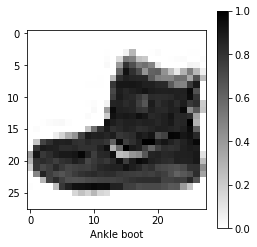

None


In [7]:
let firstTrainImage = trainImages[0]
let firstTrainLabel: Int = Int((trainNumericLabels[0].scalars)[0])
let numpyArray = firstTrainImage.makeNumpyArray().reshape(28, 28)

//print("firstTrainImage type:", type(of: firstTrainImage))
//print("numpyArray Swift type:", type(of: numpyArray))
//print("numpyArray Python type:", Python.type(numpyArray))

//print(firstTrainImage)
//print(numpyArray)
//print(numpyArray.shape)

let cmap=plt.cm.binary
plt.figure(figsize: [4, 4])
plt.imshow(numpyArray, cmap)
plt.colorbar()
plt.grid(false)
plt.xlabel(class_names[firstTrainLabel])
plt.show()

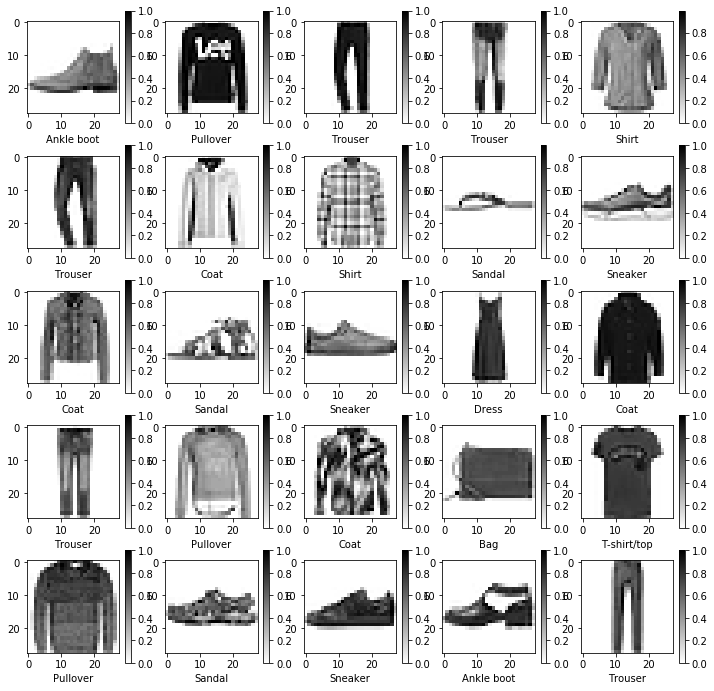

None


In [8]:
plt.figure(figsize: [12, 12])
var dis = 0
for image in 0...24 {
    let firstTestImage = testImages[image]
    let firstTestLabel: Int = Int((testNumericLabels[image].scalars)[0])
    let numpyArray = firstTestImage.makeNumpyArray().reshape(28, 28)

    //print("firstTestImage type:", type(of: firstTestImage))
    //print("numpyArray Swift type:", type(of: numpyArray))
    //print("numpyArray Python type:", Python.type(numpyArray))

    //print(firstTestImage)
    //print(numpyArray)
    //print(numpyArray.shape)

    let cmap=plt.cm.binary
    plt.subplot(5,5,dis+1)
    plt.imshow(numpyArray, cmap)
    plt.colorbar()
    plt.grid(false)
    plt.xlabel(class_names[firstTestLabel])
    dis += 1
}
plt.show()

In [0]:
let epochCount = 20
let batchSize = 128

func minibatch<Scalar>(in x: Tensor<Scalar>, at index: Int) -> Tensor<Scalar> {
    let start = index * batchSize
    return x[start..<start+batchSize]
}

/// A classifier.
struct Classifier: Layer {
    typealias Input = Tensor<Float>
    typealias Output = Tensor<Float>

    var flatten = Flatten<Float>()
    var layer1a = Dense<Float>(inputSize: 28 * 28 * 1, outputSize: 128, activation: relu)
    var layer1b = Dense<Float>(inputSize: 128, outputSize: 10, activation: softmax)

    @differentiable
    func call(_ input: Input) -> Output {
        return input.sequenced(through: flatten, layer1a, layer1b)
    }
}

var classifier = Classifier()

let optimizer = Adam(for: classifier)

In [10]:
print("Beginning training...")

struct Statistics {
    var correctGuessCount: Int = 0
    var totalGuessCount: Int = 0
    var totalLoss: Float = 0
}

// The training loop.
for epoch in 1...epochCount {
    var trainStats = Statistics()
    var testStats = Statistics()
    Context.local.learningPhase = .training
    for i in 0 ..< Int(trainLabels.shape[0]) / batchSize {
        let x = minibatch(in: trainImages, at: i)
        let y = minibatch(in: trainNumericLabels, at: i)
        // Compute the gradient with respect to the model.
        let 𝛁model = classifier.gradient { classifier -> Tensor<Float> in
            let ŷ = classifier(x)
            let correctPredictions = ŷ.argmax(squeezingAxis: 1) .== y
            trainStats.correctGuessCount += Int(
              Tensor<Int32>(correctPredictions).sum().scalarized())
            trainStats.totalGuessCount += batchSize
            let loss = softmaxCrossEntropy(logits: ŷ, labels: y)
            trainStats.totalLoss += loss.scalarized()
            return loss
        }
        // Update the model's differentiable variables along the gradient vector.
        optimizer.update(&classifier.allDifferentiableVariables, along: 𝛁model)
    }

    Context.local.learningPhase = .inference
    for i in 0 ..< Int(testLabels.shape[0]) / batchSize {
        let x = minibatch(in: testImages, at: i)
        let y = minibatch(in: testNumericLabels, at: i)
        // Compute loss on test set
        let ŷ = classifier(x)
        let correctPredictions = ŷ.argmax(squeezingAxis: 1) .== y
        testStats.correctGuessCount += Int(Tensor<Int32>(correctPredictions).sum().scalarized())
        testStats.totalGuessCount += batchSize
        let loss = softmaxCrossEntropy(logits: ŷ, labels: y)
        testStats.totalLoss += loss.scalarized()
    }

    let trainAccuracy = Float(trainStats.correctGuessCount) / Float(trainStats.totalGuessCount)
    let testAccuracy = Float(testStats.correctGuessCount) / Float(testStats.totalGuessCount)
    print("""
          [Epoch \(epoch)] \
          Training Loss: \(trainStats.totalLoss), \
          Training Accuracy: \(trainStats.correctGuessCount)/\(trainStats.totalGuessCount) \ 
          (\(trainAccuracy)), \
          Test Loss: \(testStats.totalLoss), \
          Test Accuracy: \(testStats.correctGuessCount)/\(testStats.totalGuessCount) \
          (\(testAccuracy))
          """)
}

Beginning training...
[Epoch 1] Training Loss: 806.7707, Training Accuracy: 45134/59904 (0.75343883), Test Loss: 130.6071, Test Accuracy: 7925/9984 (0.79377)
[Epoch 2] Training Loss: 764.8407, Training Accuracy: 50066/59904 (0.83577055), Test Loss: 127.564575, Test Accuracy: 8299/9984 (0.83123)
[Epoch 3] Training Loss: 755.6427, Training Accuracy: 51067/59904 (0.85248065), Test Loss: 127.05551, Test Accuracy: 8350/9984 (0.83633816)
[Epoch 4] Training Loss: 751.2464, Training Accuracy: 51526/59904 (0.8601429), Test Loss: 126.875, Test Accuracy: 8359/9984 (0.83723956)
[Epoch 5] Training Loss: 748.6821, Training Accuracy: 51821/59904 (0.8650674), Test Loss: 126.42178, Test Accuracy: 8415/9984 (0.84284854)
[Epoch 6] Training Loss: 746.5984, Training Accuracy: 52084/59904 (0.8694578), Test Loss: 125.56189, Test Accuracy: 8505/9984 (0.85186297)
[Epoch 7] Training Loss: 744.49304, Training Accuracy: 52365/59904 (0.87414867), Test Loss: 125.58565, Test Accuracy: 8509/9984 (0.8522636)
[Epoch 8]